In [1]:
from utils_functions import *

In [2]:
import os 
os.getcwdb()

b'/Users/aidan/Documents/cs596E/testing_BF-PSR/BF-PSR-Framework/Concurrent Methods/BF-PSR'

# Loading training and testing data with 100% of conversations content (offline-stage)

In [3]:
# Loading training data 
# Atributes : Conversation - Time start - Number of participants - Label (groomer/non-groomer)

PATH =  "Data/train.csv"

df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_train,Xss_train_time,Ys_train = df[0],df[1],df[2]
# posis_train = np.argwhere(Ys_train==1)
# negis_train = np.argwhere(Ys_train==0) #had to modify argwhere to where
posis_train = np.where(Ys_train==1)
negis_train = np.where(Ys_train==0)
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train))
print("Groomers Train: ",len(posis_train)," Non-groomers Train: ", len(negis_train))
print("Conversation 1: ",Xss_train[0][:20]," ...")
print("Conversation 1 start time: ",Xss_train_time[0])
print("Conversation 1 label: ",Ys_train[0])
print("*"*50)
print('\033[96m')
# Loading testing data 
# Atributes : Conversation - Time start - Number of participants - Label (groomer/non-groomer)
PATH =  "Data/test.csv"
df  = pd.read_csv(PATH,encoding='utf-8',header=None)
Xss_test,Xss_test_time,Ys_test = df[0],df[1],df[2]
# posis_test = np.argwhere(Ys_test==1)
# negis_test = np.argwhere(Ys_test==0) #had to modify argwhere to where
posis_test = np.where(Ys_test==1)
negis_test = np.where(Ys_test==0)
print("Testing data loaded ... Number of conversations: ",len(Xss_test))
print("Groomers Test: ",len(posis_test)," Non-groomers Test: ", len(negis_test))
print("Conversation 1: ",Xss_test[0][:20]," ...")
print("Conversation 1 start time: ",Xss_test_time[0])
print("Conversation 1 label: ",Ys_test[0])



Training data loaded ... Number of conversations:  66927
Groomers Train:  1  Non-groomers Train:  1
Conversation 1:  Hola. hi. whats up?   ...
Conversation 1 start time:  03:20
Conversation 1 label:  0
**************************************************

Testing data loaded ... Number of conversations:  155128
Groomers Test:  1  Non-groomers Test:  1
Conversation 1:  bugmail: [Bug 6978]   ...
Conversation 1 start time:  15:24
Conversation 1 label:  0


In [4]:
test_index = 30
print("Test Conversation : ", test_index)
print("Label is: ", Ys_test[test_index])
print(Xss_test[test_index])

Test Conversation :  30
Label is:  0
hey hi how are you whats going on 


# Loading % Interaction words per user BF.

In [5]:
# Loading pre-calculated "Interaction words per user" BF from training set
# This BF indicates, the number of participants (top five) in a given conversation.

Xss_train_participants = loading_pkl("dataSavings/train_participants_.pkl")
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train_participants))
print("In conversation 1 there are: ",Xss_train_participants[0][0]," participants")
print("*"*50)
print('\033[96m')
##########
Xss_test_participants = loading_pkl("dataSavings/participants_matrix.pkl")
# Choosing the last chunk witn 100% of the information; the rest chunks are used for
# the simulation process (Online-stage)
Xss_test_participants = Xss_test_participants[:,9]
print("Testing data loaded ... Number of conversations: ",len(Xss_test_participants))
print("In conversation 1 there are: ",Xss_test_participants[0]," participants")




Training data loaded ... Number of conversations:  66927
In conversation 1 there are:  2.0  participants
**************************************************

Testing data loaded ... Number of conversations:  155128
In conversation 1 there are:  5.0  participants


# Loading % Interaction words per user BF.

In [6]:
# Loading pre-calculated "Interaction words per user" BF from training set
# This BF indicates, in percentage (%), how much each participant interacts in a given conversation.
PATH =  "dataBase/train_interaction_words_user.pkl"
matrix = loading_pkl(PATH)
# Choosing the last chunk witn 100% of the information
matrix = matrix
Xss_train_int_user = np.reshape(matrix,(len(matrix),))
print('\033[91m')
print("Training data loaded ... Number of conversations: ",len(Xss_train_int_user))
print("In conversation 1:")
id = 0
for i in(Xss_train_int_user[0]):
    print("  Participant ",id," interacts ",i*100,"% of the conversation")
    id += 1
print("*"*50)
print('\033[96m')
##########
PATH =  "dataBase/test_early_interaction_words_user.pkl"
matrix = loading_pkl(PATH)

# Choosing the last chunk witn 100% of the information; the rest chunks are used for
# the simulation process (Online-stage)
matrix = matrix[:,[9]]
Xss_test_int_user = np.reshape(matrix,(len(matrix),))
print("Testing data loaded ... Number of conversations: ",len(Xss_test_int_user))
print("In conversation 1:")
id = 0
for i in(Xss_test_int_user[0]):
    print("  Participant ",id," interacts ",i*100,"% of the conversation")
    id += 1



Training data loaded ... Number of conversations:  66927
In conversation 1:
  Participant  0  interacts  55.219780219780226 % of the conversation
  Participant  1  interacts  44.78021978021978 % of the conversation
  Participant  2  interacts  0.0 % of the conversation
  Participant  3  interacts  0.0 % of the conversation
  Participant  4  interacts  0.0 % of the conversation
**************************************************

Testing data loaded ... Number of conversations:  155128
In conversation 1:
  Participant  0  interacts  37.83783783783784 % of the conversation
  Participant  1  interacts  33.108108108108105 % of the conversation
  Participant  2  interacts  12.837837837837837 % of the conversation
  Participant  3  interacts  13.006756756756758 % of the conversation
  Participant  4  interacts  3.209459459459459 % of the conversation


# Pipeline : preprocessing (offline stage)

## Importing somajo Tokenizer to remove noise from data; Oficial repository : https://github.com/tsproisl/SoMaJo¶

In [7]:
nc = tokenizer_Somajo_vectorizer
print('\033[91m')
print("You picked SOMAJO processing")
conversation = "This is a ? testing &apos; conversation :-*"
tokens_clean_conversation = nc(conversation)
print('\033[96m')
print(tokens_clean_conversation)
nc


You picked SOMAJO processing

['this', 'is', 'a', '?', 'testing', 'conversation', ':-*']


<function utils_functions.tokenizer_Somajo_vectorizer(document)>

In [8]:
%%time
"""
    Uncomment if this is the first execution of preprocessing training data
"""

""""
print('\033[91m')
print("Before: ",Xss_train[0])

doc_train,new_Y_train,X_train_time,X_train_participants,X_train_int_user = pre_processing_conversations(nc,Xss_train,Ys_train,Xss_train_time,Xss_train_participants,Xss_train_int_user)
print('\033[94m')

print("Train Documents, There are :",len(doc_train),": ", doc_train[0]," ",len(new_Y_train))
print('\033[92m')
print(len(doc_train)," ",len(new_Y_train)," ",len(X_train_time)," ",len(X_train_participants)," ",len(X_train_int_user))
print("Time: ",X_train_time[0]," #Participants: ",X_train_participants[0]," %Inter: ",X_train_int_user[0])
print("Saving preprocessed data ... ")
train_name = 'dataSavings/train_preprocessed.pkl' 
TRAIN = [doc_train,new_Y_train,X_train_time,X_train_participants,X_train_int_user]
saving_pkl(TRAIN,train_name)
"""


print("The preprocessed training data is already saved in folder 'dataSavings'")

The preprocessed training data is already saved in folder 'dataSavings'
CPU times: user 222 µs, sys: 83 µs, total: 305 µs
Wall time: 315 µs


In [9]:
%%time
"""
    Uncomment if this is the first execution of preprocessing testing data
"""

"""
print('\033[91m')
print("Before: ",Xss_test[0])
doc_test,new_Y_test,X_test_time,X_test_participants,X_test_int_user = pre_processing_conversations(nc,Xss_test,Ys_test,Xss_test_time,Xss_test_participants,Xss_test_int_user)
print("Test Documents, There are :",len(doc_test),": ", doc_test[0]," ",len(new_Y_test))
print('\033[92m')
print(len(doc_test)," ",len(new_Y_test)," ",len(X_test_time)," ",len(X_test_participants)," ",len(X_test_int_user))
print("Time: ",X_test_time[0]," #Participants: ",X_test_participants[0]," %Inter: ",X_test_int_user[0])
print("Saving preprocessed data ... ")
test_name = 'dataSavings/test_preprocessed.pkl'
TEST = [doc_test,new_Y_test,X_test_time,X_test_participants,X_test_int_user]
saving_pkl(TEST,test_name)
"""
print("The preprocessed testing data is already saved in folder 'dataSavings'")

The preprocessed testing data is already saved in folder 'dataSavings'
CPU times: user 52 µs, sys: 8 µs, total: 60 µs
Wall time: 62 µs


# Loading already preprocessed data

In [10]:
# Training files

train_name = 'dataSavings/train_preprocessed.pkl' # Not symbols
TRAIN = loading_pkl(train_name)
doc_train,Y_train,X_train_time,X_train_participants,X_train_int_user  = TRAIN[0],TRAIN[1],TRAIN[2],TRAIN[3],TRAIN[4]
Y_train = np.asarray(Y_train)
X_train_participants = np.asarray(X_train_participants)
X_train_int_user = np.asarray(X_train_int_user)
# posi_train = np.argwhere(Y_train==1)
# nega_train = np.argwhere(Y_train==0)
posi_train = np.where(Y_train==1)
nega_train = np.where(Y_train==0)


# Testing files
test_name = 'dataSavings/test_preprocessed.pkl' # Not symbols
TEST = loading_pkl(test_name)
doc_test,Y_test,X_test_time,X_test_participants,X_test_int_user = TEST[0],TEST[1],TEST[2],TEST[3],TEST[4]
Y_test = np.asarray(Y_test)
X_test_participants = np.asarray(X_test_participants)
X_test_participants = np.expand_dims(X_test_participants, axis=1)
X_test_int_user = np.asarray(X_test_int_user)
# posi_test  = np.argwhere(Y_test==1)
# nega_test  = np.argwhere(Y_test==0)
posi_test  = np.where(Y_test==1)
nega_test  = np.where(Y_test==0)

print("Empty conversations were removed in preprocessing process")
print("Before precessing Train Groomers: ",len(posis_train), " After: ",len(posi_train), "Lost: ",len(posis_train)-len(posi_train))
print("Before precessing Test Groomers: ",len(posis_test), " After: ",len(posi_test), "Lost: ",len(posis_test)-len(posi_test))


Empty conversations were removed in preprocessing process
Before precessing Train Groomers:  1  After:  1 Lost:  0
Before precessing Test Groomers:  1  After:  1 Lost:  0


# Starting with the PSR ++ method

In [11]:
%%time
vocabulary = calculating_vocabulary(doc_train)
print("Vocabulary: ",len(vocabulary))

Vocabulary:  45814
CPU times: user 640 ms, sys: 29.6 ms, total: 669 ms
Wall time: 669 ms


In [12]:
%%time
"""
    Uncomment if this is the first execution of DF calculation process
"""
"""
DF = calculated_df(doc_train,vocabulary)
saving_pkl(DF,"dataSavings/df")
"""
DF = loading_pkl("dataSavings/df")
print("Number of documents with token :-*: ",DF[":-*"])

Number of documents with token :-*:  415
CPU times: user 12.4 ms, sys: 3.72 ms, total: 16.1 ms
Wall time: 16.5 ms


In [13]:
%%time
# PSR weights files
"""
    Uncomment if this is the first execution of PSR weights calculation process
"""
"""
psr_weights = PSR_weight_schema(doc_train,Y_train,vocabulary,DF)
saving_pkl(psr_weights,'dataSavings/psr.pkl')
"""
psr_weights = loading_pkl('dataSavings/psr.pkl')
print(len(psr_weights))

45845
CPU times: user 56.4 ms, sys: 7.54 ms, total: 63.9 ms
Wall time: 65.6 ms


In [14]:
print(len(vocabulary))

45814


# Performing the PSR++ method with the training data
## The psr++ method contain fundamental modifications to the original PSR method

In [15]:
%%time
DR = PSR_plus_document_representation(doc_train,psr_weights)
print('\033[91m')
DR = np.reshape(DR,(len(DR),2))
print(DR.shape)
print("Training set ...")
print("Now each training document is represent in a vector space of size 2 (groomer and non-groomer)")
#plotting(DR,Y_train)


(66914, 2)
Training set ...
Now each training document is represent in a vector space of size 2 (groomer and non-groomer)
CPU times: user 2.96 s, sys: 45.4 ms, total: 3.01 s
Wall time: 2.99 s


In [16]:
%%time
DRT = PSR_plus_document_representation(doc_test,psr_weights)
print('\033[94m')
DRT = np.reshape(DRT,(len(DRT),2))
print(DRT.shape)

print("Testing set ...")
print("Now each testing document is represent in a vector space of size 2 (groomer and non-groomer)")
#plotting(DRT,Y_test)


(155101, 2)
Testing set ...
Now each testing document is represent in a vector space of size 2 (groomer and non-groomer)
CPU times: user 7.08 s, sys: 72.9 ms, total: 7.15 s
Wall time: 7.1 s


# Pipeline : Calculating proposed Behavioral Features

# Time when a conversation starts BF

In [17]:
"""
    Uncomment if this is the first execution of Time when a conversation starts BF
"""


"""
print("Time when a conversation starts BF")
n_features = 2 # Hours (HH) : Minutes (MM)
time_bf_train = calculating_time(X_train_time,n_features)
time_bf_test = calculating_time(X_test_time,n_features)
print("time_bf_train: ",time_bf_train.shape," time_bf_test: ",time_bf_test.shape)
print('\033[91m')
print("First time registered in the training set: ",X_train_time[0])
print("First time registered in the training set after normalization: ",time_bf_train[0])
print('\033[96m')
print("First time registered in the testing set: ",X_test_time[0])
print("First time registered in the testing set after normalization: ",time_bf_test[0])
# Saving calculations
time_bf = (time_bf_train,time_bf_test)
saving_pkl(time_bf,"dataSavings/time_bf.pkl")
"""
# Loading calculations
time_bf = loading_pkl("dataSavings/time_bf.pkl")

print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-saved BF from 'dataSavings' folder ... 


# Correctly spelled words BF

In [18]:
"""
    Uncomment if this is the first execution of Correctly spelled words BF
"""

"""
print("Correctly spelled words BF")
train_csw = calculating_CSW(doc_train)
test_csw = calculating_CSW(doc_test)
print("train_tw: ",train_csw.shape," test_tw: ",test_csw.shape)
print('\033[91m')
print("% of Correctly spelled words in training conversation 1) : ",train_csw[0][0]*100)
print('\033[96m')
print("% of Correctly spelled words in testing conversation 1) : ",test_csw[0][0]*100)
# Saving calculations
correctly_bf = (train_csw,test_csw)
saving_pkl(correctly_bf,"dataSavings/correctly_bf.pkl")
"""
# Loading calculations
correctly_bf = loading_pkl("dataSavings/correctly_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-saved BF from 'dataSavings' folder ... 


# Sexual topic words BF 

In [19]:
print("Loading pre-calculated extended list of sexual words with fastText library")
sexual_words = loading_pkl("dataBase/augmented_sexual_words.pkl")
print("Sexual words extended list: ",len(sexual_words))

"""
    Uncomment if this is the first execution of Sexual topic words BF
"""

"""
sexual_train = calculating_sexual_words(sexual_words, doc_train)
sexual_test = calculating_sexual_words(sexual_words, doc_test)
print("sexual_train: ",sexual_train.shape," sexual_test: ",sexual_test.shape)
print('\033[91m')
print("% of Sexual topic words in training conversation 1) : ",sexual_train[0][0]*100)
print('\033[96m')
print("% of Sexual topic words in testing conversation 1) : ",sexual_test[0][0]*100)
# Saving calculations
sexual_bf = (sexual_train,sexual_test)
saving_pkl(sexual_bf,"dataSavings/sexual_bf.pkl")
"""
# Loading calculations
sexual_bf = loading_pkl("dataSavings/sexual_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Loading pre-calculated extended list of sexual words with fastText library
Sexual words extended list:  506
Loading pre-saved BF from 'dataSavings' folder ... 


# NRC sentiment and emotional markers BF

In [20]:
# Loading NRC lexicon
print("NRC emotional markers")
nrc_emotions = loading_pkl("dataBase/emotions_nrc.pkl")    

"""
    Uncomment if this is the first execution of NRC emotional markers BF
""" 

"""
n_emo = 10 # NRC lexicon has 10 (8 emotions + 2 sentiments)
nrc_emo_train = calculating_emotional_markers(nrc_emotions, doc_train,n_emo)
nrc_emo_test = calculating_emotional_markers(nrc_emotions, doc_test,n_emo)
# Choosing the most significative ones
nrc_emo_train = nrc_emo_train[:, [0,1,4,6,7,8]]
nrc_emo_test = nrc_emo_test[:, [0,1,4,6,7,8]]
print("nrc_emo_train: ",nrc_emo_train.shape," nrc_emo_test",nrc_emo_test.shape)
print('\033[91m')
print("% of Anticipation in training conversation 1) : ",nrc_emo_train[0][0]*100)
print('\033[96m')
print("% of Anticipation in testing conversation 1) : ",nrc_emo_test[0][0]*100)
# Saving calculations
nrc_bf = (nrc_emo_train,nrc_emo_test)
saving_pkl(nrc_bf,"dataSavings/nrc_bf.pkl")
"""

# Loading calculations
nrc_bf = loading_pkl("dataSavings/nrc_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

NRC emotional markers
Loading pre-saved BF from 'dataSavings' folder ... 


# Depeche emotional markers BF

In [21]:
# Loading Depeche lexicon
print("Depeche emotional markers")
depeche_emotions_lexicon = loading_pkl("dataBase/emotions_depeche.pkl" )

# Converting vector of weights in binary terms (1/0), max values turns 1, otthers 0
depeche_emotions = processing_depeche_lexicon(depeche_emotions_lexicon)

"""
    Uncomment if this is the first execution of Depeche emotional markers BF
"""

"""
n_emo = 8 # Depeche lexicon has 8 emotions
de_emo_train = calculating_emotional_markers(depeche_emotions, doc_train,n_emo)
de_emo_test = calculating_emotional_markers(depeche_emotions, doc_test,n_emo)


# Choosing the most significative ones
de_emo_train = de_emo_train[:, [1,2,6,7]] 
de_emo_test = de_emo_test[:, [1,2,6,7]] 
print("dee_emo_train :",de_emo_train.shape," dee_emo_test:",de_emo_test.shape)
print('\033[91m')
print("% of Inspired in training conversation 1) : ",de_emo_train[0][2]*100)
print('\033[96m')
print("% of Inspired in testing conversation 1) : ",de_emo_test[0][2]*100)
# Saving calculations
depeche_bf = (de_emo_train,de_emo_test)
saving_pkl(depeche_bf,"dataSavings/depeche_bf.pkl")
"""

# Loading calculations
depeche_bf = loading_pkl("dataSavings/depeche_bf.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")

Depeche emotional markers
Loading pre-saved BF from 'dataSavings' folder ... 


# Emoticons BF

In [22]:
"""
    Uncomment if this is the first execution of Emoticons BF
"""

print("Emoticons")

"""
emoticons_list = list()
emoticon_train,emoticons_list = calculating_emoticons_set(doc_train,emoticons_list)
print("emoticons_list: ",len(emoticons_list))
emoticon_test,emoticons_list = calculating_emoticons_set(doc_test,emoticons_list)
print("emoticons_list: ",len(emoticons_list))
emoticons_set = set(emoticons_list)
print("emoticons_set: ",len(emoticons_set))
print("emoticon_train :",emoticon_train.shape," emoticon_test:",emoticon_test.shape)
print('\033[91m')
print("% of Emoticons in training conversation 1) : ",emoticon_train[0][0]*100)
print('\033[96m')
print("% of Emoticons in testing conversation 1) : ",emoticon_test[0][0]*100)
# Saving calculations
emoticons_bf = (emoticon_train,emoticon_test)
saving_pkl(emoticons_bf,"dataSavings/emoticons_bf.pkl")
saving_pkl(emoticons_set,"dataBase/emoticons_set.pkl")
"""

# Loading calculations
emoticons_bf = loading_pkl("dataSavings/emoticons_bf.pkl")
emoticons_set = loading_pkl("dataBase/emoticons_set.pkl")
print("Loading pre-saved BF from 'dataSavings' folder ... ")


Emoticons
Loading pre-saved BF from 'dataSavings' folder ... 


# Saving all the proposed BFs in a list

In [23]:
# Obtaing the pre-calculated BF : Number of participants BF and Interections words per user BF
participants_bf = (X_train_participants,X_test_participants)
interactions_bf = (X_train_int_user,X_test_int_user)
BFS = [participants_bf,interactions_bf,depeche_bf,emoticons_bf,correctly_bf,time_bf,sexual_bf,nrc_bf]
print("There are: ",len(BFS)," Behavioral Features")

There are:  8  Behavioral Features


# Performing BF-PSR method : Training model (offline-stage)

In [24]:
print('\033[91m')
print("Performing BF-PSR method")
#labels_BFS = ["Time when a conversation starts","Correctly spelled words","Sexual topic words","NRC emotions","Depeche emotions","Emoticons","Number of participants","Interaction words per user"]
labels_BFS = ["Number of participants","Interaction words per user","Depeche emotions","Emoticons","Correctly spelled words","Time when a conversation starts","Sexual topic words","NRC emotions",]
f1_g, model = BF_PSR(DR,DRT,Y_train,Y_test,BFS,labels_BFS,8)
print('\033[94m')
print("F1 mesure of the positive class: ",f1_g * 100, "% with 100% of the information")


Performing BF-PSR method
0 ) Stacking  Number of participants  BF of shape:  (66914, 1)
1 ) Stacking  Interaction words per user  BF of shape:  (66914, 5)
2 ) Stacking  Depeche emotions  BF of shape:  (66914, 4)
3 ) Stacking  Emoticons  BF of shape:  (66914, 1)
4 ) Stacking  Correctly spelled words  BF of shape:  (66914, 1)
5 ) Stacking  Time when a conversation starts  BF of shape:  (66914, 2)
6 ) Stacking  Sexual topic words  BF of shape:  (66914, 1)
7 ) Stacking  NRC emotions  BF of shape:  (66914, 6)
The final PF-PSR vector is of shape:  (66914, 23)   (155101, 23)

F1 mesure of the positive class:  73.08 % with 100% of the information


# Pipeline: (Online-stage)
## Perfoming predictions with partial data : Simulating uncoming messages

In [25]:
%%time
"""
    Uncomment if pre_processing_chunks folder is empty, it may take a while ...
"""
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# pre_processing_chunks(nc,retains,Ys_test,Xss_test_time)
print("Check if the folder /pre_processing_chunks is empty, if it is: compile the comment line, it may take a while")

Check if the folder /pre_processing_chunks is empty, if it is: compile the comment line, it may take a while
CPU times: user 252 µs, sys: 129 µs, total: 381 µs
Wall time: 352 µs


In [26]:
def simulation(model,percentages,labels_BF,num_BF):
    f1_l = []
    for percentage in range(len(percentages)):
        # Obtaining x% of the conversations already preprocessed 
        print("Obtaining preprocessed conversations with: ",(percentage+1) * 10, "% of information available")
        chunk_information = loading_pkl("Pre_pro_chunks/chunk_preprocessed_"+str(percentage))
        doc_partial,Y_partial,X_time_partial,X_participants_partial,X_int_user_partial  = chunk_information
        Y_partial = np.asarray(Y_partial)
        print("Therea are ",len(doc_partial)," conversations with ",percentages[percentage] * 100," % of information available")
        
        # Obtaining the partial profiles with the PSR++ method
        DRT_partial = PSR_plus_document_representation(doc_partial,psr_weights)
        print("  ",DRT_partial.shape)
        
        # Calculating proposed BF with partial information
        '''Time when a conversation starts BF'''
        print("Calculating: Time when a conversation starts BF ...")
        time_partial = calculating_time(X_time_partial,2)
        print("  ",time_partial.shape)
        
        '''Correctly spelled words BF'''
        print("Calculating: Correctly spelled words BF ...")
        csw_partial = calculating_CSW(doc_partial)
        print("  ",csw_partial.shape)
        
        '''Sexual topic words BF'''
        print("Calculating: Sexual topic words BF ...")
        sexual_partial = calculating_sexual_words(sexual_words, doc_partial)
        print("  ",sexual_partial.shape)
        
        '''NRC emotional markers BF'''
        print("Calculating: NRC emotional markers BF ...")
        nrc_partial = calculating_emotional_markers(nrc_emotions, doc_partial,10)
        nrc_partial = nrc_partial[:, [0,1,4,6,7,8]]
        print("  ",nrc_partial.shape)

        '''Depeche emotional markers BF'''
        print("Calculating: Depeche emotional markers BF ...")
        de_partial = calculating_emotional_markers(depeche_emotions, doc_partial,8)
        de_partial = de_partial[:, [1,2,6,7]]
        print("  ",de_partial.shape)
        
        '''Emoticons BF'''
        print("Calculating: Emoticons BF ...")
        emoticon_partial = calculating_emoticons_faster(emoticons_set, doc_partial)
        print("  ",emoticon_partial.shape)
        
        '''Number of participants BF'''
        print("Calculating: Number of participants BF ...")
        participants_partial = np.asarray(X_participants_partial)
        print("  ",participants_partial.shape)

        '''% Word interactions per user BF'''
        print("Calculating: Word interactions per user BF ...")
        int_user_partial = column_extract(X_int_user_partial)
        print("  ",int_user_partial.shape)
        
        '''Putting toguether all proposed BFs'''
        BFS = [participants_partial,int_user_partial,de_partial,emoticon_partial,csw_partial,time_partial,sexual_partial,nrc_partial]
        
        '''Performing early predictions with partial information'''
        f1_g = BF_PSR_predictions(model,DRT_partial,Y_partial,BFS,labels_BF,num_BF)
        f1_l.append(f1_g)
        print("F1 groomer: ",f1_g)
        print("*"*50)

    return f1_l
        

In [27]:
#added the following line
#import nltk
# nltk.download('omw-1.4')
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
f1_l = simulation(model,retains,labels_BFS,8)
print("List of F1_g results: ",f1_l)

Obtaining preprocessed conversations with:  10 % of information available
Therea are  124017  conversations with  10.0  % of information available
   (124017, 2)
Calculating: Time when a conversation starts BF ...
   (124017, 2)
Calculating: Correctly spelled words BF ...
   (124017, 1)
Calculating: Sexual topic words BF ...
   (124017, 1)
Calculating: NRC emotional markers BF ...
   (124017, 6)
Calculating: Depeche emotional markers BF ...
   (124017, 4)
Calculating: Emoticons BF ...
   (124017, 1)
Calculating: Number of participants BF ...
   (124017, 1)
Calculating: Word interactions per user BF ...
   (124017, 5)
0 ) Stacking  Number of participants  BF
1 ) Stacking  Interaction words per user  BF
2 ) Stacking  Depeche emotions  BF
3 ) Stacking  Emoticons  BF
4 ) Stacking  Correctly spelled words  BF
5 ) Stacking  Time when a conversation starts  BF
6 ) Stacking  Sexual topic words  BF
7 ) Stacking  NRC emotions  BF
The final BF-PSR vector is of size:  (124017, 23)
F1 groomer:  0.5

F1 groomer:  0.7078
**************************************************
Obtaining preprocessed conversations with:  90 % of information available
Therea are  155101  conversations with  90.0  % of information available
   (155101, 2)
Calculating: Time when a conversation starts BF ...
   (155101, 2)
Calculating: Correctly spelled words BF ...
   (155101, 1)
Calculating: Sexual topic words BF ...
   (155101, 1)
Calculating: NRC emotional markers BF ...
   (155101, 6)
Calculating: Depeche emotional markers BF ...
   (155101, 4)
Calculating: Emoticons BF ...
   (155101, 1)
Calculating: Number of participants BF ...
   (155101, 1)
Calculating: Word interactions per user BF ...
   (155101, 5)
0 ) Stacking  Number of participants  BF
1 ) Stacking  Interaction words per user  BF
2 ) Stacking  Depeche emotions  BF
3 ) Stacking  Emoticons  BF
4 ) Stacking  Correctly spelled words  BF
5 ) Stacking  Time when a conversation starts  BF
6 ) Stacking  Sexual topic words  BF
7 ) Stacking  NRC emotions

# Plotting the F1 mesure of tha groomer class 

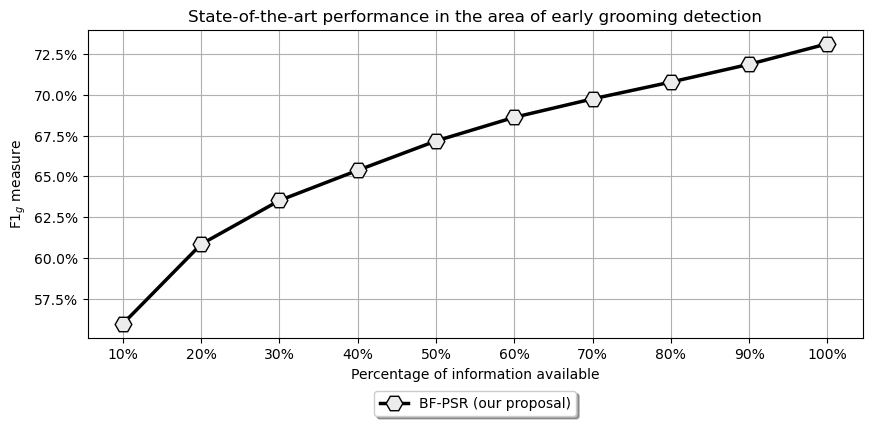

In [28]:
f1_list = f1_l.copy()
plotting_bf_psr(f1_list)

# Prediction functions for the new PJZ and PJZC datasets

In [29]:
#np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
#I added verbose option to figure out what things should look like
def groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,labels=[],_predict=False,verbose=False):
    
    #print("Document: ",doc_partial)
    if verbose:
        print("Document: ",doc_partial)
    # Obtaining the partial profiles with the PSR++ method
    DRT_partial = PSR_plus_document_representation(doc_partial,psr_weights)
    if verbose:
        print("DRT shape: ", DRT_partial.shape)
#     print("  ",DRT_partial.shape)
    
    # Calculating proposed BF with partial information
    '''Time when a conversation starts BF'''
    #print("Calculating: Time when a conversation starts BF ...")
    time_partial = calculating_time(X_time_partial,2)
    time_partial = np.nan_to_num(time_partial) ## might need to change this because they normalize based on there being other values but we are doing only one value
    if verbose:
        print("Time: ", time_partial)#HH, MM
    
    #print("  ",time_partial.shape)
    
    '''Correctly spelled words BF'''
    #print("Calculating: Correctly spelled words BF ...")
    csw_partial = calculating_CSW(doc_partial)
    #print("  ",csw_partial.shape)
    if verbose:
        print("Correctly spelled words: ", csw_partial.shape)
    
    '''Sexual topic words BF'''
    #print("Calculating: Sexual topic words BF ...")
    sexual_partial = calculating_sexual_words(sexual_words, doc_partial)
    #print("  ",sexual_partial.shape)
    if verbose:
        print("Sexual topic words: ", sexual_partial.shape)
    
    '''NRC emotional markers BF'''
    #print("Calculating: NRC emotional markers BF ...")
    nrc_partial = calculating_emotional_markers(nrc_emotions, doc_partial,10)
    nrc_partial = nrc_partial[:, [0,1,4,6,7,8]]
    #print("  ",nrc_partial.shape)
    if verbose:
        print("NRC emotional markers: ", nrc_partial.shape)

    '''Depeche emotional markers BF'''
    #print("Calculating: Depeche emotional markers BF ...")
    de_partial = calculating_emotional_markers(depeche_emotions, doc_partial,8)
    de_partial = de_partial[:, [1,2,6,7]]
    #print("  ",de_partial.shape)
    if verbose:
        print("Depeche emotional markers: ", de_partial.shape)
    
    '''Emoticons BF'''
    #print("Calculating: Emoticons BF ...")
    emoticon_partial = calculating_emoticons_faster(emoticons_set, doc_partial)
    #print("  ",emoticon_partial.shape)
    if verbose:
        print("Emoticons: ", emoticon_partial.shape)
    
    '''Number of participants BF'''
    #print("Calculating: Number of participants BF ...")
    participants_partial = np.asarray(X_participants_partial)
    #print("  ",participants_partial.shape)
    if verbose:
        temp = [X_participants_partial]
        print(temp)
        print(X_participants_partial)
        participants_partial = np.asarray(temp)
        print("number of participants: ", participants_partial)
        

    '''% Word interactions per user BF'''
    #print("Calculating: Word interactions per user BF ...")
    int_user_partial = column_extract(X_int_user_partial)
    #print("  ",int_user_partial.shape)
    if verbose:
        int_user_partial = X_int_user_partial
        print("word interactions per used: ", int_user_partial)
    
    '''Putting toguether all proposed BFs'''
    BFS = [participants_partial,int_user_partial,de_partial,emoticon_partial,csw_partial,time_partial,sexual_partial,nrc_partial]
    labels_BFS = ["Number of participants","Interaction words per user","Depeche emotions","Emoticons","Correctly spelled words","Time when a conversation starts","Sexual topic words","NRC emotions",]
    BF_PSR_partial = DRT_partial
    if verbose:
        print("SHAPES:")
        print(BF_PSR_partial.shape)
    for i in range(8):
        bf_partial = BFS[i]
        if verbose:
            pass
            #print(bf_partial.shape)
        #print(i,") Stacking ",labels_BFS[i]," BF")
        BF_PSR_partial = np.hstack((BF_PSR_partial,bf_partial))
        #print("The final BF-PSR vector is of size: ",BF_PSR_partial.shape)
        

    if _predict == False:
        probabilities = model.predict_proba(BF_PSR_partial)
        return probabilities
    else:
        predictions = model.predict(BF_PSR_partial) 
        f1_g = np.round(f1_score(labels,predictions,average='binary',pos_label=1),4)
        error_f1_g = error_filtering_PJdataset(labels,predictions)
        print("error_f1_g: ",error_f1_g)
        return f1_g,error_f1_g
        



In [32]:
def calculating_preds(PATH,num_chunks):
    c = tokenizer_Somajo_vectorizer    
    print("Extracting conversations")
    data_set = loading_pkl(PATH) 
    matrix_text,labels,start_time_conversations,number_participants,matrix = data_set
    print("%text: ",(matrix_text.shape))
    print("labels: ",len(labels),labels[0])
    print("start_time_conversations: ",len(start_time_conversations),start_time_conversations[0])
    print("# participants: ",(number_participants.shape),number_participants[0][0])
    print("%int matrix: ",(matrix.shape),matrix[0][0])
    print("+"*40)
    
    
    probs = list()
    
    ###
    #My horrible abomination code 
    
    #print(matrix_text[121][:9]) ## the second index being 9 gives you the whole conversation
#     pred_value = 10
#     matrix_index = 0
#     for temp_index in range(len(matrix_text)): 
#         if pred_value > 0:
#             if labels[temp_index] == 1:
#                 matrix_index = temp_index
#                 pred_value -= 1
#     matrix_index = 15
            
#     doc_partial = [matrix_text[matrix_index][9]] #enclose in brackets so that we get 1 conversation
#     X_time_partial = [start_time_conversations[matrix_index]]
#     X_participants_partial = number_participants[matrix_index][9]
#     X_int_user_partial = [matrix[matrix_index][9]]
#     Y_partial = [labels[matrix_index]] #same reasoning as above
    
#     #print("Doc partial before: ")
# #     print(doc_partial)
#     groomer_before = sum([1 for i in labels if i ==1])
#     '''Applying preprocessing'''
#     doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial = pre_processing_conversations_new_datasets(c,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,True)
#     Y_partial = np.asarray(Y_partial)
#     groomer_after = sum([1 for i in labels if i ==1])
# #     print("Doc partial after: ")
# #     print(doc_partial)
# #     print("X_time_partial: ")
# #     print(X_time_partial)
# #     print("X_participants_partial")
# #     print(X_participants_partial)
# #     print("X_int_user_partial")
# #     print(X_int_user_partial)
# #     print("Y_partial")
# #     print(Y_partial)
    
#     #using this line for verbose
#     probs = groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,False,True)
#     print(probs)  
#     print("Conversation index: ", matrix_index)
#     print("Label is: ", Y_partial)
#     print("Predicted label is:", np.argmax(probs))
#     return
    ###
    for  chunk in range(num_chunks):
        
        doc_partial = matrix_text[:,chunk]
        print(len(doc_partial))
        
        X_time_partial = start_time_conversations
        X_participants_partial = number_participants[:,chunk]
        X_int_user_partial = matrix[:,chunk]
        Y_partial = labels
        
        groomer_before = sum([1 for i in labels if i ==1])
        '''Applying preprocessing'''
        doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial = pre_processing_conversations_new_datasets(c,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,True)
        Y_partial = np.asarray(Y_partial)
        groomer_after = sum([1 for i in labels if i ==1])

        '''Batch version '''
        f1_g,error_f1_g = groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,True)  
        probs.append(error_f1_g)
        print("At chunk ",chunk+1, "F1_g: ",f1_g," # Documents: ",len(Y_partial))
        print("*"*40)
    
    print(probs)
    f1_list = probs.copy()
    plotting_bf_psr(f1_list)



# Testing with PJZC dataset

Extracting conversations
%text:  (21070, 10)
labels:  21070 0
start_time_conversations:  21070 18:10
# participants:  (21070, 10) [1]
%int matrix:  (21070, 10) [1. 0. 0. 0. 0.]
++++++++++++++++++++++++++++++++++++++++
21070
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.4811
At chunk  1 F1_g:  0.4811  # Documents:  21069
****************************************
21070
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.5145
At chunk  2 F1_g:  0.5145  # Documents:  21070
****************************************
21070
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.5351
At chunk  3 F1_g:  0.5351  # Documents:  21070
****************************************
21070
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.5613
At chunk  4 F1_g:  0.5613  # Documents:  21070
****************************************
21070
Calculating error ...
Cu

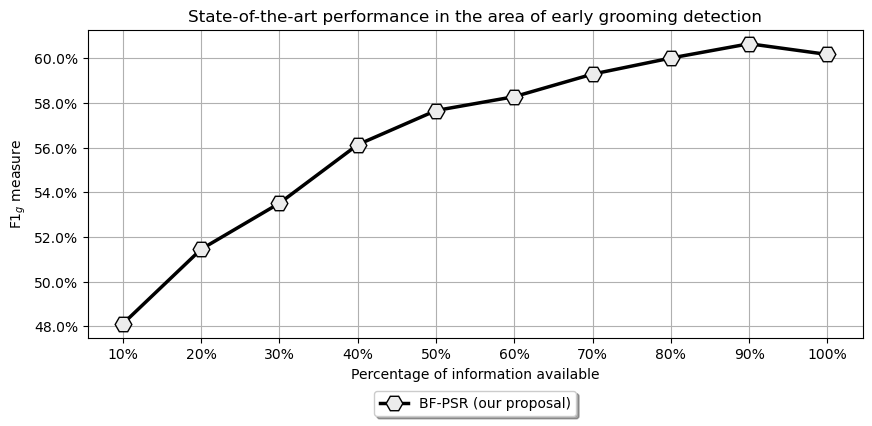

In [33]:
PATH = "Data/PJZC.pkl"
calculating_preds(PATH,10)

# Testing with PJZ dataset

Extracting conversations
%text:  (13822, 10)
labels:  13822 0
start_time_conversations:  13822 05:16
# participants:  (13822, 10) [2]
%int matrix:  (13822, 10) [0.625 0.375 0.    0.    0.   ]
++++++++++++++++++++++++++++++++++++++++
13822
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.6592
At chunk  1 F1_g:  0.6592  # Documents:  13821
****************************************
13822
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.6916
At chunk  2 F1_g:  0.6916  # Documents:  13822
****************************************
13822
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.7147
At chunk  3 F1_g:  0.7147  # Documents:  13822
****************************************
13822
Calculating error ...
Current groomers in test:  1104
Filter groomers:  0
error_f1_g:  0.7309
At chunk  4 F1_g:  0.7309  # Documents:  13822
****************************************
13822
Calculati

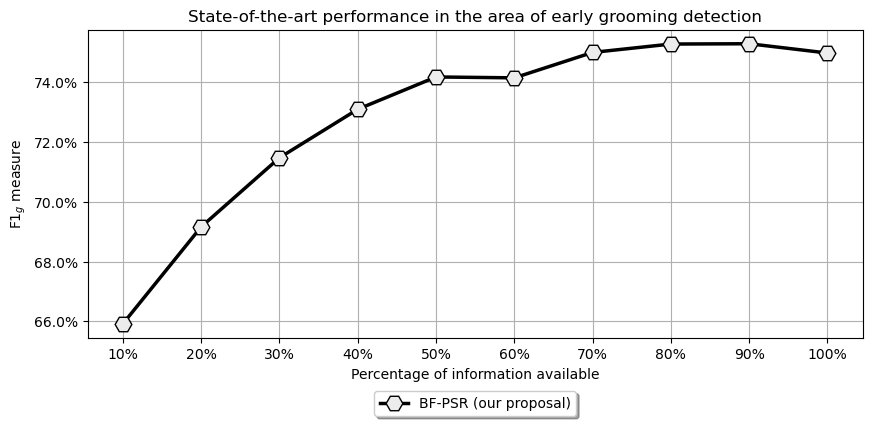

In [34]:
PATH = "Data/PJZ.pkl"
calculating_preds(PATH,10)

# Testing for a single conversation

In [35]:
#np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
#I added verbose option to figure out what things should look like
def single_conv_groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,labels=[],_predict=False,verbose=False):
    
    #print("Document: ",doc_partial)
    if verbose:
        print("Document: ",doc_partial)
    # Obtaining the partial profiles with the PSR++ method
    DRT_partial = PSR_plus_document_representation(doc_partial,psr_weights)
    if verbose:
        print("DRT shape: ", DRT_partial)
#     print("  ",DRT_partial.shape)
    
    # Calculating proposed BF with partial information
    '''Time when a conversation starts BF'''
    #print("Calculating: Time when a conversation starts BF ...")
    
    time_feature = np.zeros((len(X_time_partial),2)) # Number of conversations x num features
    id = 0
    for i in X_time_partial:
        hours,minutes  = i.split(":")
        time_feature[id][0],time_feature[id][1] = int(hours), int (minutes)
        id +=1
    if verbose:
        print(X_time_partial)
#     print("####TIME FEATURE")
#     print(time_feature)
    time_feature = (time_feature - 0) / (59 - 0) # this is because if we don't normalize it then it will always be an entry like [0,1] or [1,0] this step just does a similar for of normalization as would be expected when operating on the large dataset
#     print(time_feature)
    time_partial = time_feature # because we want to it be closer to what it would be when lots of data is being processed together
#     time_partial = calculating_time(X_time_partial,2)
#     time_partial = np.nan_to_num(time_partial) ## might need to change this because they normalize based on there being other values but we are doing only one value
    if verbose:
        print("Time: ", time_partial)#HH, MM
    
    #print("  ",time_partial.shape)
    
    '''Correctly spelled words BF'''
    #print("Calculating: Correctly spelled words BF ...")
    csw_partial = calculating_CSW(doc_partial)
    #print("  ",csw_partial.shape)
    if verbose:
        print("Correctly spelled words: ", csw_partial)
    
    '''Sexual topic words BF'''
    #print("Calculating: Sexual topic words BF ...")
    sexual_partial = calculating_sexual_words(sexual_words, doc_partial)
    #print("  ",sexual_partial.shape)
    if verbose:
        print("Sexual topic words: ", sexual_partial)
    
    '''NRC emotional markers BF'''
    #print("Calculating: NRC emotional markers BF ...")
    nrc_partial = calculating_emotional_markers(nrc_emotions, doc_partial,10)
    nrc_partial = nrc_partial[:, [0,1,4,6,7,8]]
    #print("  ",nrc_partial.shape)
    if verbose:
        print("NRC emotional markers: ", nrc_partial)

    '''Depeche emotional markers BF'''
    #print("Calculating: Depeche emotional markers BF ...")
    de_partial = calculating_emotional_markers(depeche_emotions, doc_partial,8)
    de_partial = de_partial[:, [1,2,6,7]]
    #print("  ",de_partial.shape)
    if verbose:
        print("Depeche emotional markers: ", de_partial)
    
    '''Emoticons BF'''
    #print("Calculating: Emoticons BF ...")
    emoticon_partial = calculating_emoticons_faster(emoticons_set, doc_partial)
    #print("  ",emoticon_partial.shape)
    if verbose:
        print("Emoticons: ", emoticon_partial)
    
    '''Number of participants BF'''
    #print("Calculating: Number of participants BF ...")
    participants_partial = np.asarray(X_participants_partial)
    #print("  ",participants_partial.shape)
    if True:
        temp = [X_participants_partial]
        if verbose:
            print(temp)
            print(X_participants_partial)
        participants_partial = np.asarray(temp)
        if verbose:
            print("number of participants: ", participants_partial)
        

    '''% Word interactions per user BF'''
    #print("Calculating: Word interactions per user BF ...")
    int_user_partial = column_extract(X_int_user_partial)
    #print("  ",int_user_partial.shape)
    if True:
        int_user_partial = X_int_user_partial
        if verbose:
            print("word interactions per used: ", int_user_partial)
    
    '''Putting toguether all proposed BFs'''
    BFS = [participants_partial,int_user_partial,de_partial,emoticon_partial,csw_partial,time_partial,sexual_partial,nrc_partial]
    labels_BFS = ["Number of participants","Interaction words per user","Depeche emotions","Emoticons","Correctly spelled words","Time when a conversation starts","Sexual topic words","NRC emotions",]
    BF_PSR_partial = DRT_partial
    if verbose:
        print("SHAPES:")
        print(BF_PSR_partial.shape)
    for i in range(8):
        bf_partial = BFS[i]
        if verbose:
            pass
            #print(bf_partial.shape)
        #print(i,") Stacking ",labels_BFS[i]," BF")
        BF_PSR_partial = np.hstack((BF_PSR_partial,bf_partial))
        #print("The final BF-PSR vector is of size: ",BF_PSR_partial.shape)
        

    if _predict == False:
        probabilities = model.predict_proba(BF_PSR_partial)
        return probabilities
    else:
        predictions = model.predict(BF_PSR_partial) 
        f1_g = np.round(f1_score(labels,predictions,average='binary',pos_label=1),4)
        error_f1_g = error_filtering_PJdataset(labels,predictions)
        print("error_f1_g: ",error_f1_g)
        return f1_g,error_f1_g
        


In [36]:
def single_conv_calculating_preds(PATH,groomer_index = -1,true_index = -1):
    c = tokenizer_Somajo_vectorizer    
    print("Extracting conversations")
    data_set = loading_pkl(PATH) 
    matrix_text,labels,start_time_conversations,number_participants,matrix = data_set
    print("%text: ",(matrix_text.shape))
    print("labels: ",len(labels),labels[0])
    print("start_time_conversations: ",len(start_time_conversations),start_time_conversations[0])
    print("# participants: ",(number_participants.shape),number_participants[0][0])
    print("%int matrix: ",(matrix.shape),matrix[0][0])
    print("+"*40)
    
    
    probs = list()
    
    ###
    #My horrible abomination code 
    
    #print(matrix_text[121][:9]) ## the second index being 9 gives you the whole conversation
    matrix_index = 0
    if groomer_index != -1:
        pred_value = groomer_index
        for temp_index in range(len(matrix_text)): 
            if pred_value > 0: #we are getting the groomer_index'th instane of a groomer
                if labels[temp_index] == 1:
                    matrix_index = temp_index
                    pred_value -= 1
    if true_index != -1:
        matrix_index = true_index
                    
    partial_amount = 9
    doc_partial = [matrix_text[matrix_index][partial_amount]] #enclose in brackets so that we get 1 conversation
    X_time_partial = [start_time_conversations[matrix_index]]
    X_participants_partial = number_participants[matrix_index][partial_amount]
    X_int_user_partial = [matrix[matrix_index][partial_amount]]
    Y_partial = [labels[matrix_index]] #same reasoning as above
    
    #print("Doc partial before: ")
#     print(doc_partial)
    groomer_before = sum([1 for i in labels if i ==1])
    '''Applying preprocessing'''
    doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial = pre_processing_conversations_new_datasets(c,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,True)
    Y_partial = np.asarray(Y_partial)
    groomer_after = sum([1 for i in labels if i ==1])
#     print("Doc partial after: ")
#     print(doc_partial)
#     print("X_time_partial: ")
#     print(X_time_partial)
#     print("X_participants_partial")
#     print(X_participants_partial)
#     print("X_int_user_partial")
#     print(X_int_user_partial)
#     print("Y_partial")
#     print(Y_partial)
    
    #using this line for verbose
    probs = single_conv_groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,False,True)
    print(probs)  
    print("Conversation index: ", matrix_index)
    print("Label is: ", Y_partial)
    print("Predicted label is:", np.argmax(probs))
    return



In [80]:
PATH = "Data/PJZ.pkl"
single_conv_calculating_preds(PATH,groomer_index = 71,true_index= 881)

Extracting conversations
%text:  (13822, 10)
labels:  13822 0
start_time_conversations:  13822 05:16
# participants:  (13822, 10) [2]
%int matrix:  (13822, 10) [0.625 0.375 0.    0.    0.   ]
++++++++++++++++++++++++++++++++++++++++
Document:  [['i', 'wo', 'nt', 'okayyyyy', '(', ':', ':))', 'bed', 'time', 'for', 'me', 'hun', 'nighty', 'lol']]
DRT shape:  [[0.34403003 0.5845414 ]]
['13:46']
Time:  [[0.22033898 0.77966102]]
Correctly spelled words:  [[0.42857143]]
Sexual topic words:  [[0.]]
NRC emotional markers:  [[0.         0.07142857 0.         0.         0.         0.        ]]
Depeche emotional markers:  [[0.14285714 0.07142857 0.21428571 0.        ]]
Emoticons:  [[0.07142857]]
[[2]]
[2]
number of participants:  [[2]]
word interactions per used:  [array([0.66666667, 0.33333333, 0.        , 0.        , 0.        ])]
SHAPES:
(1, 2)
[[0.14959754 0.85040246]]
Conversation index:  881
Label is:  [1]
Predicted label is: 1


In [79]:
#brief data exploration: 
PATH = "Data/PJZ.pkl"
data_set = loading_pkl(PATH) 
matrix_text,labels,start_time_conversations,number_participants,matrix = data_set
print(matrix_text[881])

['I wont ' 'I wont Okayyyyy ' 'I wont Okayyyyy (: '
 'I wont Okayyyyy (: :)) ' 'I wont Okayyyyy (: :)) Bed time for me hun '
 'I wont Okayyyyy (: :)) Bed time for me hun '
 'I wont Okayyyyy (: :)) Bed time for me hun '
 'I wont Okayyyyy (: :)) Bed time for me hun '
 'I wont Okayyyyy (: :)) Bed time for me hun Nighty lol '
 'I wont Okayyyyy (: :)) Bed time for me hun Nighty lol ']


In [39]:
def real_data_single_conv_calculating_preds(info, verbose=False):
    c = tokenizer_Somajo_vectorizer
    probs = list()
    
    ###
    #My horrible abomination code 
               
    
    doc_partial = [info[0]] #enclose in brackets so that we get 1 conversation
    X_time_partial = [info[1]]
    X_participants_partial = info[2]
    X_int_user_partial = [info[3]]
    Y_partial = [info[4]] #same reasoning as above
    
    #print("Doc partial before: ")
#     print(doc_partial)
    groomer_before = sum([1 for i in labels if i ==1])
    '''Applying preprocessing'''
    doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial = pre_processing_conversations_new_datasets(c,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,True)
    Y_partial = np.asarray(Y_partial)
    groomer_after = sum([1 for i in labels if i ==1])
#     print("Doc partial after: ")
#     print(doc_partial)
#     print("X_time_partial: ")
#     print(X_time_partial)
#     print("X_participants_partial")
#     print(X_participants_partial)
#     print("X_int_user_partial")
#     print(X_int_user_partial)
#     print("Y_partial")
#     print(Y_partial)
    
    #need to change the single_conv_groomer_predictions
    #using this line for verbose 
    probs = single_conv_groomer_predictions(model,doc_partial,X_time_partial,X_participants_partial,X_int_user_partial,Y_partial,False,verbose)
#     print(probs)  
#     print("Label is: ", Y_partial)
#     print("Predicted label is:", np.argmax(probs))
    return probs


In [40]:
# now for some testing with our other dataset!
# f = open("Data/Cleaned_BF-PSR/ArmySgt1961.txt", "r")
# f = open("Data/Cleaned_BF-PSR/aticloose.txt", "r")
def read_data(filename):
#     f = open("Data/Cleaned_BF-PSR/asian_kreationz.txt", "r")
    f = open(filename, "r")
    info = f.read()
    f.close()
    info = info.split('*+*')[:-1]
    info[2] = [int(info[2])]
    info[4] = int(info[4])
    #make the interaction words correct
    info[3] = info[3][1:-1].split(',')
    info[3][0] = float(info[3][0])
    info[3][1] = float(info[3][1])
    if len(info[3]) < 5: #this will always be true for this dataset
        for i in range(5-len(info[3])):
            info[3].append(0.0)
    return info
info = read_data("Data/Cleaned_BF-PSR/asian_kreationz.txt")
print(info)

[" hi hey hello howu doin asl? k 13/f/riverside u 19/m/l.a. too old for u? not 4 chat ok wat u doin nada bored bout u same lol kinda warm today huh nice yep so u chat here alot? some u sometimes u lookin to hook up when u chat here huh? hehe lol never have lol y u askin nuthin, thats what i do sometimes lol hey whcih 1 r u in ur prof which one u like? hehe lol on the left sweety kewl ur cuter yep haha ty u only 19? look like 25 yep kewl either way does that turn u on? being 25? wat me lookin older doesnt matter i guess kool u have pic? on prof oh ok' but goto homepage k dang u look yummy hehe lol ty cuty we should hook up haha lol y wat u wanna do anything whats on ur mind? i dont kno, just wanan party really? mom and dad going to vegas tonite lets party oic poor girl all alone lol dont matter to me we can party if u like hey mind if i add ya sure ty so they goin outta town huh? yea like 9 or so lets do sumthin mthen how far u fomr riverside i live in l.a. sweety i dont mind the drive 

In [41]:
real_data_single_conv_calculating_preds(info,verbose=False)

array([[0.07201644, 0.92798356]])

In [54]:
#analyze all the files in a directory
def analyze_files(directory):
    correct = 0
    total = 0
    wrong_files = []
    for filename in os.scandir(directory):
        
        if filename.is_file():
            print("*********")
            print(filename.name)
            info = read_data(filename)
            res = real_data_single_conv_calculating_preds(info,verbose=False)
            pred = np.argmax(res)
            print(res)
            print(pred)
            if pred == info[-1]:
                correct +=1
            else:
                wrong_files.append([filename.name,info[0]])
            total +=1
    print("Correct: ", str(correct))
    print("Total: ", str(total))
    print(correct/total)
    return wrong_files

In [62]:
#now lets put it all together
import os
directory = "Data/Cleaned_BF-PSR/"
wrong_files_TP = analyze_files(directory)
        
        

*********
marc_00_48089.txt
[[0.17510451 0.82489549]]
1
*********
red387peter.txt
[[0.01734034 0.98265966]]
1
*********
sebastian_calif.txt
[[0.09001469 0.90998531]]
1
*********
needinit1983.txt
[[0.38545294 0.61454706]]
1
*********
pitbulldavid2001.txt
[[0.0682133 0.9317867]]
1
*********
sunrise_sunset66.txt
[[0.10377927 0.89622073]]
1
*********
italianlover37.txt
[[0.71996498 0.28003502]]
0
*********
jkspeedster0112.txt
[[0.0640595 0.9359405]]
1
*********
fightingfalconsguy.txt
[[0.82604554 0.17395446]]
0
*********
jon_raven2000.txt
[[0.05331081 0.94668919]]
1
*********
texassailor04.txt
[[0.04181983 0.95818017]]
1
*********
schutzea.txt
[[0.05638673 0.94361327]]
1
*********
user194547.txt
[[0.50872792 0.49127208]]
0
*********
nickpaul19802000.txt
[[0.0777858 0.9222142]]
1
*********
jleno9.txt
[[0.97465377 0.02534623]]
0
*********
mikespikegetiingcrazytocu.txt
[[0.02676995 0.97323005]]
1
*********
Wulfker_Dragonslayer.txt
[[0.07753805 0.92246195]]
1
*********
lee_greer74.txt
[[0.0515

In [72]:
count =0
for val in wrong_files_TP:
    print(count)
    print(val[0])
    print(val[1])
    count+=1

0
italianlover37.txt
 hi hi 14 m flagler county u me too how are you whrerr are you exactly im in palm coast area u? right on 100 so what you doing this eve aoff all day here this eve? i dunno why just bored o k what your stats 5 8 145 14 almost 15 lt brown hair bronw eyes u really your that young yes i am im typical italian stocky muscular cute face nice body yea i see ur pic how tall tho? im better looking then my pic though lost some weight 5 8 kewl u dont look bad from ur pic  what you looking  for i dunno u well hot sex what else lol hahah welllll i never had it witha guy before really are you gay well bi i like mess around w a guy before its hot isn't it lol but not like allll the way omg yes how do i know youre not cop lol durr i dunno lol how i kno ure not my dad settin me up? lol what do you want to do with a guy you like getting your cock sucked yeah is it nice i got that from a chick before but not a guy yea dood it rulez hot are youi home alone now yeaaa my pops is at work 

In [75]:
directory = "Data/Cleaned_twitterData"
wrong_files_TN = analyze_files(directory)


*********
twitterData_479.txt
[[9.99947496e-01 5.25035913e-05]]
0
*********
twitterData_323.txt
[[9.99977865e-01 2.21345656e-05]]
0
*********
twitterData_445.txt
[[0.9961781 0.0038219]]
0
*********
twitterData_1589.txt
[[0.99862729 0.00137271]]
0
*********
twitterData_451.txt
[[0.99801607 0.00198393]]
0
*********
twitterData_337.txt
[[0.93998658 0.06001342]]
0
*********
twitterData_1210.txt
[[0.99839655 0.00160345]]
0
*********
twitterData_1576.txt
[[0.98211117 0.01788883]]
0
*********
twitterData_1562.txt
[[0.99797794 0.00202206]]
0
*********
twitterData_1204.txt
[[0.91760028 0.08239972]]
0
*********
twitterData_486.txt
[[0.1816897 0.8183103]]
1
*********
twitterData_492.txt
[[0.33778355 0.66221645]]
1
*********
twitterData_1238.txt
[[9.99590882e-01 4.09118210e-04]]
0
*********
twitterData_109.txt
[[0.94153803 0.05846197]]
0
*********
twitterData_647.txt
[[0.78766482 0.21233518]]
0
*********
twitterData_121.txt
[[9.99955444e-01 4.45563018e-05]]
0
*********
twitterData_135.txt
[[0.9948

[[9.99323500e-01 6.76500136e-04]]
0
*********
twitterData_16.txt
[[0.98832187 0.01167813]]
0
*********
twitterData_1818.txt
[[0.99852267 0.00147733]]
0
*********
twitterData_724.txt
[[9.99954301e-01 4.56994054e-05]]
0
*********
twitterData_1830.txt
[[0.9512445 0.0487555]]
0
*********
twitterData_1824.txt
[[0.99897603 0.00102397]]
0
*********
twitterData_730.txt
[[0.98948 0.01052]]
0
*********
twitterData_903.txt
[[0.98878802 0.01121198]]
0
*********
twitterData_1617.txt
[[0.9989012 0.0010988]]
0
*********
twitterData_1171.txt
[[9.99691648e-01 3.08351948e-04]]
0
*********
twitterData_1165.txt
[[0.75198048 0.24801952]]
0
*********
twitterData_1603.txt
[[0.96202562 0.03797438]]
0
*********
twitterData_917.txt
[[9.99101340e-01 8.98659675e-04]]
0
*********
twitterData_1159.txt
[[9.99748340e-01 2.51660315e-04]]
0
*********
twitterData_268.txt
[[0.99481451 0.00518549]]
0
*********
twitterData_240.txt
[[9.99986951e-01 1.30487129e-05]]
0
*********
twitterData_526.txt
[[0.79315814 0.20684186]]
0

[[9.99993628e-01 6.37225857e-06]]
0
*********
twitterData_250.txt
[[9.99994888e-01 5.11210130e-06]]
0
*********
twitterData_2.txt
[[9.99400148e-01 5.99851984e-04]]
0
*********
twitterData_536.txt
[[0.93904828 0.06095172]]
0
*********
twitterData_522.txt
[[9.99869806e-01 1.30194013e-04]]
0
*********
twitterData_1388.txt
[[9.99584773e-01 4.15227026e-04]]
0
*********
twitterData_244.txt
[[0.9982587 0.0017413]]
0
*********
twitterData_913.txt
[[0.9926945 0.0073055]]
0
*********
twitterData_1607.txt
[[0.98436727 0.01563273]]
0
*********
twitterData_1161.txt
[[9.99896748e-01 1.03252310e-04]]
0
*********
twitterData_1175.txt
[[9.99864650e-01 1.35349678e-04]]
0
*********
twitterData_1613.txt
[[9.99563219e-01 4.36781316e-04]]
0
*********
twitterData_907.txt
[[0.98849194 0.01150806]]
0
*********
twitterData_1149.txt
[[0.99472547 0.00527453]]
0
*********
twitterData_708.txt
[[0.99358649 0.00641351]]
0
*********
twitterData_12.txt
[[0.33569385 0.66430615]]
1
*********
twitterData_1808.txt
[[0.8343

[[9.99154393e-01 8.45607201e-04]]
0
*********
twitterData_870.txt
[[0.96608189 0.03391811]]
0
*********
twitterData_1002.txt
[[9.99899865e-01 1.00134617e-04]]
0
*********
twitterData_1016.txt
[[9.99917421e-01 8.25794469e-05]]
0
*********
twitterData_864.txt
[[0.98450281 0.01549719]]
0
*********
twitterData_1770.txt
[[0.81063279 0.18936721]]
0
*********
twitterData_694.txt
[[9.99994400e-01 5.60002547e-06]]
0
*********
twitterData_1758.txt
[[0.98214551 0.01785449]]
0
*********
twitterData_858.txt
[[0.94888623 0.05111377]]
0
*********
twitterData_680.txt
[[9.99789025e-01 2.10975010e-04]]
0
*********
twitterData_119.txt
[[9.99764995e-01 2.35004838e-04]]
0
*********
twitterData_657.txt
[[9.99978219e-01 2.17810200e-05]]
0
*********
twitterData_131.txt
[[0.99740889 0.00259111]]
0
*********
twitterData_125.txt
[[0.99840714 0.00159286]]
0
*********
twitterData_643.txt
[[0.99753468 0.00246532]]
0
*********
twitterData_1200.txt
[[0.98716581 0.01283419]]
0
*********
twitterData_1566.txt
[[0.994039

[[0.99806354 0.00193646]]
0
*********
twitterData_1272.txt
[[0.98611304 0.01388696]]
0
*********
twitterData_355.txt
[[9.99917952e-01 8.20477187e-05]]
0
*********
twitterData_1299.txt
[[0.96874913 0.03125087]]
0
*********
twitterData_433.txt
[[0.97374228 0.02625772]]
0
*********
twitterData_427.txt
[[9.99999918e-01 8.17601818e-08]]
0
*********
twitterData_341.txt
[[0.99894754 0.00105246]]
0
*********
twitterData_369.txt
[[9.99999677e-01 3.22515365e-07]]
0
*********
twitterData_419.txt
[[9.99991084e-01 8.91588243e-06]]
0
*********
twitterData_431.txt
[[9.99952017e-01 4.79828334e-05]]
0
*********
twitterData_357.txt
[[0.78198792 0.21801208]]
0
*********
twitterData_343.txt
[[0.99368609 0.00631391]]
0
*********
twitterData_425.txt
[[0.98682278 0.01317722]]
0
*********
twitterData_1502.txt
[[9.99992931e-01 7.06916326e-06]]
0
*********
twitterData_1264.txt
[[9.99952330e-01 4.76700235e-05]]
0
*********
twitterData_1270.txt
[[0.51591638 0.48408362]]
0
*********
twitterData_1516.txt
[[0.864860

[[0.21738768 0.78261232]]
1
*********
twitterData_1507.txt
[[9.99999923e-01 7.67889052e-08]]
0
*********
twitterData_1513.txt
[[0.95345976 0.04654024]]
0
*********
twitterData_1275.txt
[[9.99884707e-01 1.15292856e-04]]
0
*********
twitterData_1922.txt
[[9.99999882e-01 1.17923505e-07]]
0
*********
twitterData_636.txt
[[0.99885589 0.00114411]]
0
*********
twitterData_150.txt
[[9.99429154e-01 5.70846268e-04]]
0
*********
twitterData_1088.txt
[[9.99842780e-01 1.57219768e-04]]
0
*********
twitterData_144.txt
[[9.99518427e-01 4.81572535e-04]]
0
*********
twitterData_622.txt
[[0.69577891 0.30422109]]
0
*********
twitterData_178.txt
[[0.99506497 0.00493503]]
0
*********
twitterData_1739.txt
[[0.99276769 0.00723231]]
0
*********
twitterData_193.txt
[[9.99893999e-01 1.06000764e-04]]
0
*********
twitterData_187.txt
[[0.51671655 0.48328345]]
0
*********
twitterData_839.txt
[[0.98523147 0.01476853]]
0
*********
twitterData_1705.txt
[[0.9879834 0.0120166]]
0
*********
twitterData_811.txt
[[0.9977813

[[9.99482459e-01 5.17540826e-04]]
0
*********
twitterData_812.txt
[[9.99983664e-01 1.63356688e-05]]
0
*********
twitterData_755.txt
[[0.99894737 0.00105263]]
0
*********
twitterData_1841.txt
[[0.99674405 0.00325595]]
0
*********
twitterData_1699.txt
[[0.99874638 0.00125362]]
0
*********
twitterData_1855.txt
[[9.99916170e-01 8.38297141e-05]]
0
*********
twitterData_741.txt
[[0.74874629 0.25125371]]
0
*********
twitterData_999.txt
[[9.99635646e-01 3.64353513e-04]]
0
*********
twitterData_769.txt
[[9.99998741e-01 1.25881956e-06]]
0
*********
twitterData_73.txt
[[9.99891472e-01 1.08527704e-04]]
0
*********
twitterData_67.txt
[[9.99925524e-01 7.44755291e-05]]
0
*********
twitterData_1869.txt
[[9.99995680e-01 4.31950779e-06]]
0
*********
twitterData_1882.txt
[[9.99999338e-01 6.61988338e-07]]
0
*********
twitterData_796.txt
[[9.99903769e-01 9.62308986e-05]]
0
*********
twitterData_1128.txt
[[9.99515021e-01 4.84978868e-04]]
0
*********
twitterData_98.txt
[[0.96231563 0.03768437]]
0
*********
t

[[0.99571503 0.00428497]]
0
*********
twitterData_1681.txt
[[0.99893178 0.00106822]]
0
*********
twitterData_1695.txt
[[0.99870395 0.00129605]]
0
*********
twitterData_759.txt
[[9.99998838e-01 1.16209920e-06]]
0
*********
twitterData_981.txt
[[0.67070066 0.32929934]]
0
*********
twitterData_43.txt
[[0.87942795 0.12057205]]
0
*********
twitterData_1865.txt
[[0.99086674 0.00913326]]
0
*********
twitterData_771.txt
[[0.9983481 0.0016519]]
0
*********
twitterData_765.txt
[[9.99996332e-01 3.66838295e-06]]
0
*********
twitterData_1871.txt
[[9.99943871e-01 5.61290994e-05]]
0
*********
twitterData_94.txt
[[9.99998396e-01 1.60371786e-06]]
0
*********
twitterData_1124.txt
[[0.13678929 0.86321071]]
1
*********
twitterData_1642.txt
[[0.80691855 0.19308145]]
0
*********
twitterData_956.txt
[[0.99813788 0.00186212]]
0
*********
twitterData_942.txt
[[9.99977788e-01 2.22122312e-05]]
0
*********
twitterData_1656.txt
[[9.99995196e-01 4.80395068e-06]]
0
*********
twitterData_1130.txt
[[9.99972372e-01 2.7

[[9.99837682e-01 1.62318267e-04]]
0
*********
twitterData_772.txt
[[0.99592222 0.00407778]]
0
*********
twitterData_68.txt
[[9.99999698e-01 3.02314277e-07]]
0
*********
twitterData_1133.txt
[[9.9924347e-01 7.5653041e-04]]
0
*********
twitterData_83.txt
[[0.98715976 0.01284024]]
0
*********
twitterData_941.txt
[[9.99995085e-01 4.91455344e-06]]
0
*********
twitterData_799.txt
[[9.99184434e-01 8.15566384e-04]]
0
*********
twitterData_1655.txt
[[0.8554787 0.1445213]]
0
*********
twitterData_1641.txt
[[9.99938492e-01 6.15082244e-05]]
0
*********
twitterData_1899.txt
[[0.99792543 0.00207457]]
0
*********
twitterData_955.txt
[[9.99951518e-01 4.84821275e-05]]
0
*********
twitterData_97.txt
[[0.9950887 0.0049113]]
0
*********
twitterData_1127.txt
[[9.99987011e-01 1.29891585e-05]]
0
*********
twitterData_1669.txt
[[0.99395356 0.00604644]]
0
*********
twitterData_969.txt
[[0.99866206 0.00133794]]
0
*********
twitterData_558.txt
[[9.99995913e-01 4.08650717e-06]]
0
*********
twitterData_1494.txt
[[

[[9.99946531e-01 5.34687812e-05]]
0
*********
twitterData_788.txt
[[9.99992332e-01 7.66760129e-06]]
0
*********
twitterData_207.txt
[[9.99040612e-01 9.59388068e-04]]
0
*********
twitterData_561.txt
[[9.99994866e-01 5.13428628e-06]]
0
*********
twitterData_575.txt
[[9.99974756e-01 2.52438405e-05]]
0
*********
twitterData_213.txt
[[9.99959259e-01 4.07408544e-05]]
0
*********
twitterData_1491.txt
[[9.99981967e-01 1.80330773e-05]]
0
*********
twitterData_1485.txt
[[0.99491984 0.00508016]]
0
*********
twitterData_549.txt
[[9.99586023e-01 4.13976787e-04]]
0
*********
twitterData_1308.txt
[[9.99990964e-01 9.03553965e-06]]
0
*********
twitterData_1334.txt
[[0.99622915 0.00377085]]
0
*********
twitterData_1452.txt
[[0.99747548 0.00252452]]
0
*********
twitterData_1446.txt
[[0.84652496 0.15347504]]
0
*********
twitterData_1320.txt
[[9.99972545e-01 2.74551696e-05]]
0
*********
twitterData_1447.txt
[[9.99978552e-01 2.14483736e-05]]
0
*********
twitterData_1321.txt
[[0.99778722 0.00221278]]
0
*****

[[9.99930226e-01 6.97736289e-05]]
0
*********
twitterData_1492.txt
[[0.99422438 0.00577562]]
0
*********
twitterData_238.txt
[[0.99759489 0.00240511]]
0
*********
twitterData_1479.txt
[[9.99973535e-01 2.64649480e-05]]
0
*********
twitterData_1323.txt
[[0.99319573 0.00680427]]
0
*********
twitterData_589.txt
[[0.98446307 0.01553693]]
0
*********
twitterData_1445.txt
[[0.9987732 0.0012268]]
0
*********
twitterData_1451.txt
[[0.75171134 0.24828866]]
0
*********
twitterData_1337.txt
[[9.99971109e-01 2.88906281e-05]]
0
*********
twitterData_1450.txt
[[9.99342624e-01 6.57375705e-04]]
0
*********
twitterData_1336.txt
[[0.99618122 0.00381878]]
0
*********
twitterData_1322.txt
[[9.99764511e-01 2.35489353e-04]]
0
*********
twitterData_1444.txt
[[9.99998541e-01 1.45853493e-06]]
0
*********
twitterData_588.txt
[[9.99707382e-01 2.92618497e-04]]
0
*********
twitterData_1478.txt
[[9.99998872e-01 1.12830950e-06]]
0
*********
twitterData_1493.txt
[[0.99498692 0.00501308]]
0
*********
twitterData_239.tx

[[0.98910265 0.01089735]]
0
*********
twitterData_1387.txt
[[0.87799122 0.12200878]]
0
*********
twitterData_1608.txt
[[9.99990273e-01 9.72738380e-06]]
0
*********
twitterData_908.txt
[[0.98738351 0.01261649]]
0
*********
twitterData_1152.txt
[[9.99962052e-01 3.79482641e-05]]
0
*********
twitterData_920.txt
[[9.99419970e-01 5.80030027e-04]]
0
*********
twitterData_1634.txt
[[9.99951213e-01 4.87869426e-05]]
0
*********
twitterData_1620.txt
[[0.82000208 0.17999792]]
0
*********
twitterData_934.txt
[[9.99994359e-01 5.64115606e-06]]
0
*********
twitterData_1146.txt
[[0.99626474 0.00373526]]
0
*********
twitterData_707.txt
[[0.98949168 0.01050832]]
0
*********
twitterData_1813.txt
[[0.99151367 0.00848633]]
0
*********
twitterData_1807.txt
[[9.99885156e-01 1.14843804e-04]]
0
*********
twitterData_713.txt
[[0.98510118 0.01489882]]
0
*********
twitterData_21.txt
[[9.99784659e-01 2.15341356e-04]]
0
*********
twitterData_1191.txt
[[9.99769948e-01 2.30052220e-04]]
0
*********
twitterData_1185.txt

[[9.99992978e-01 7.02220696e-06]]
0
*********
twitterData_116.txt
[[0.04973755 0.95026245]]
1
*********
twitterData_658.txt
[[9.99946006e-01 5.39940548e-05]]
0
*********
twitterData_880.txt
[[0.90404674 0.09595326]]
0
*********
twitterData_1794.txt
[[9.99991414e-01 8.58570907e-06]]
0
*********
twitterData_1780.txt
[[0.95029032 0.04970968]]
0
*********
twitterData_894.txt
[[9.99644900e-01 3.55100198e-04]]
0
*********
twitterData_1569.txt
[[0.9977755 0.0022245]]
0
*********
twitterData_499.txt
[[0.99575755 0.00424245]]
0
*********
twitterData_1555.txt
[[0.99363987 0.00636013]]
0
*********
twitterData_1233.txt
[[9.99998034e-01 1.96592317e-06]]
0
*********
twitterData_1227.txt
[[0.98068907 0.01931093]]
0
*********
twitterData_1541.txt
[[9.99999967e-01 3.34296445e-08]]
0
*********
twitterData_466.txt
[[0.99351555 0.00648445]]
0
*********
twitterData_300.txt
[[0.97545916 0.02454084]]
0
*********
twitterData_314.txt
[[0.59357236 0.40642764]]
0
*********
twitterData_472.txt
[[9.99475269e-01 5.

[[9.99993852e-01 6.14833544e-06]]
0
*********
twitterData_313.txt
[[9.99703263e-01 2.96736549e-04]]
0
*********
twitterData_475.txt
[[9.99986256e-01 1.37440975e-05]]
0
*********
twitterData_1591.txt
[[0.99887348 0.00112652]]
0
*********
twitterData_1585.txt
[[0.7477661 0.2522339]]
0
*********
twitterData_449.txt
[[9.99083280e-01 9.16720042e-04]]
0
*********
twitterData_1208.txt
[[9.99060946e-01 9.39054418e-04]]
0
*********
twitterData_1552.txt
[[0.8832267 0.1167733]]
0
*********
twitterData_1234.txt
[[0.9880764 0.0119236]]
0
*********
twitterData_1220.txt
[[9.99509710e-01 4.90290241e-04]]
0
*********
twitterData_1546.txt
[[0.9678442 0.0321558]]
0
*********
twitterData_105.txt
[[9.99999974e-01 2.57373493e-08]]
0
*********
twitterData_663.txt
[[0.98310619 0.01689381]]
0
*********
twitterData_677.txt
[[9.99627230e-01 3.72770354e-04]]
0
*********
twitterData_111.txt
[[0.99588329 0.00411671]]
0
*********
twitterData_139.txt
[[9.99012851e-01 9.87149405e-04]]
0
*********
twitterData_1793.txt


In [76]:
'''
Correct:  1878
Total:  1925
0.9755844155844156'''
count = 0
for val in wrong_files_TN:
    print(count)
    print(val[0])
    print(val[1])
    count+=1

0
twitterData_486.txt
 I miss my family 😐 I miss u you really don't :( don't you ever 🙄 still real life hurt by you
1
twitterData_492.txt
 i want hot chocolate &amp; my bf i can get you got chocolate but not your bf why can't u get me my bf idk where he is ur right there
2
twitterData_1416.txt
 How to be romantic in 4 words: I ordered you pizza I have season tickets... touché You coming up Friday night to the Gameday Tailgate? We'll be there all night long. gonna try! Depends on what games I cover Friday night Come after the HS games.
3
twitterData_4.txt
 what day are you coming to Effie?? tomorrow 😍👌🏽im leaving today once I get off work make sure I have a bed and seat saved next to you!
4
twitterData_732.txt
 hi we are going to Disney world k love you ❤️ still loves you 🤔 you said Christmas time ! but what days ☹️️ when are you off so we can have a lunch date 🤔
5
twitterData_487.txt
 I haven't been to Dave and busters yet 😳 I need to go ASAP let's go!! you comin??? no doubt she's comi